In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 19.1 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

In [68]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
start = '2000-01-01'
end = '2023-03-10'
ticker = 'USDJPY=X'
df = yf.download(tickers=ticker, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [23]:
#df = pd.read_csv('/content/drive/MyDrive/study/MarketData/USDJPY.csv')
#df = df.rename(columns={'日付け':'ds', '終値':'y'})
#df['ds'] = pd.to_datetime(df['ds'],  format='%Y年%m月%d日')

In [56]:
df = df.reset_index()
df['weekday'] = df['Date'].dt.weekday
df = df.rename(columns={'Date':'ds', 'Close':'y'})

In [57]:
df_org = df.copy()

In [58]:
df = df[df['ds']>'2020-01-01']

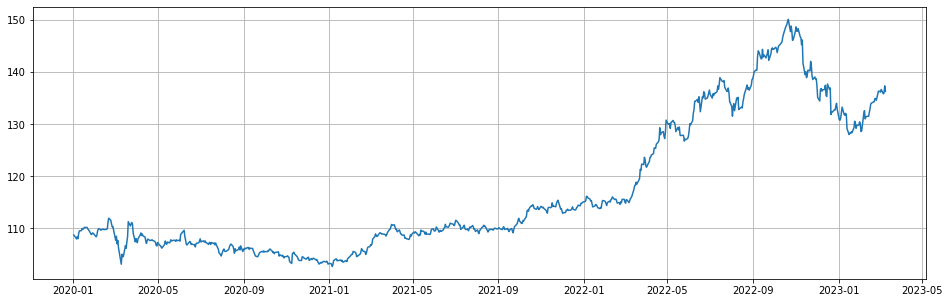

In [59]:
fig = plt.figure(figsize=(16,5))
plt.plot(df['ds'], df['y'])
plt.grid()
plt.show()

In [60]:
print(Prophet.__doc__)

Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
        flat trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoints` is not supplied,
        then n_changepoints potential changepoints are selected uniformly from
        the first `changepoint_range` proportion of the history.
    changepoint_range: Proportion of history in which trend changepoints will
        be estimated. Defaults to 0.8 for the first 80%. Not used if
        `changepoints` is specified.
    yearly_seasonality: Fit yearly seasonality.
        Can be 'auto', True, False, or a number of Fourier terms to generate.
    weekly_seasonality: Fit weekly seasonality.
        Can be 'auto', True, False, o

デフォルトでの予測

In [61]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/btbffln5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/ciirmgsc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18480', 'data', 'file=/tmp/tmp8ho3rjit/btbffln5.json', 'init=/tmp/tmp8ho3rjit/ciirmgsc.json', 'output', 'file=/tmp/tmp8ho3rjit/prophet_modelhwdm4x8u/prophet_model-20230309162740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:27:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:27:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [65]:
future = m.make_future_dataframe(periods=90)
future['weekday'] = future['ds'].dt.weekday
future = future[future['weekday']<5]
forecast = m.predict(future)

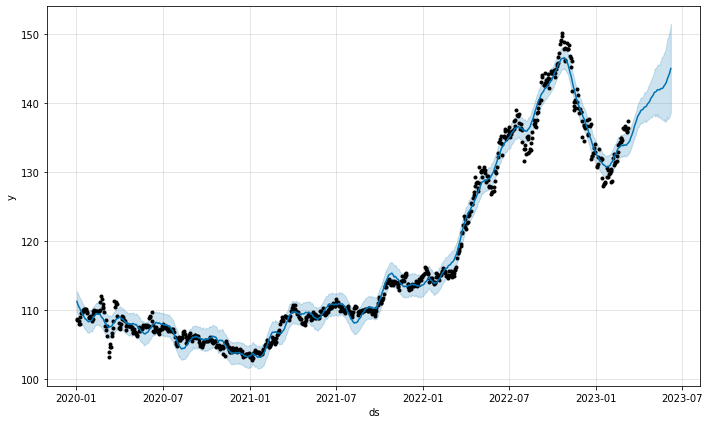

In [66]:
fig1 = m.plot(forecast)

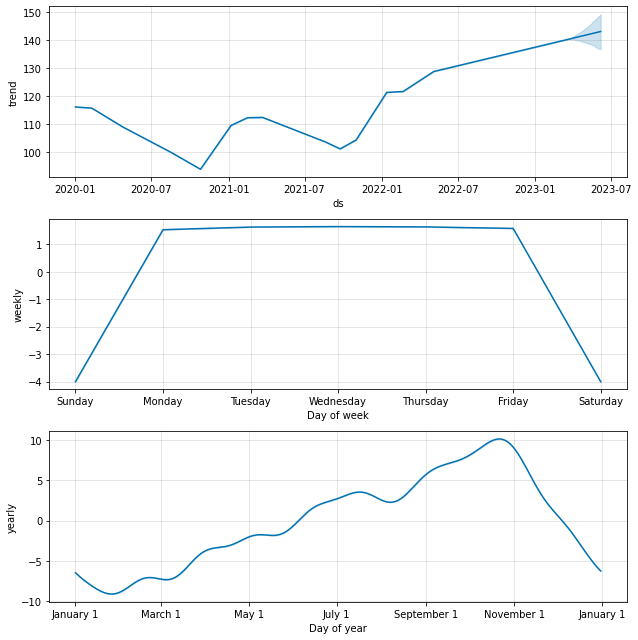

In [67]:
fig2 = m.plot_components(forecast)

デフォルトでは最初の80%でしか変化点を検知しない

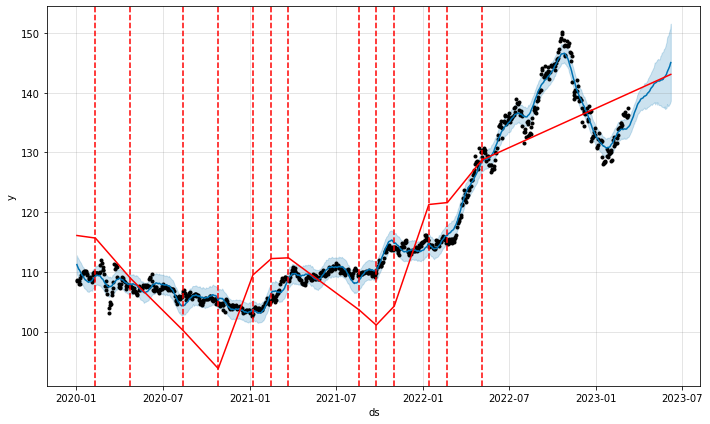

In [69]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

トレンド変化点を推定する幅はchangepoint_rangeで調整することができる

In [73]:
m = Prophet(changepoint_range=1)
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/043aen40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/bleunu4l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23742', 'data', 'file=/tmp/tmp8ho3rjit/043aen40.json', 'init=/tmp/tmp8ho3rjit/bleunu4l.json', 'output', 'file=/tmp/tmp8ho3rjit/prophet_modelrnsiulr3/prophet_model-20230309163236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:32:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:32:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [76]:
future = m.make_future_dataframe(periods=90)
future['weekday'] = future['ds'].dt.weekday
future = future[future['weekday']<5]
forecast = m.predict(future)

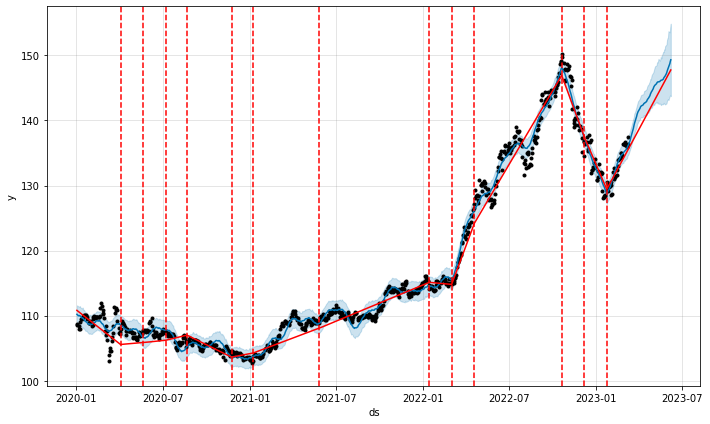

In [77]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

トレンド変化点のオーバーフィット（アンダーフィット）はchangepoint_prior_scale(デフォルト0.05)で調整する。この値を小さくするとアンダーフィット方向に、大きくするとオーバーフィット方向になる

In [178]:
m = Prophet(changepoint_range=1, changepoint_prior_scale=0.01)
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/vsbqnmpw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/4a_qr_2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45697', 'data', 'file=/tmp/tmp8ho3rjit/vsbqnmpw.json', 'init=/tmp/tmp8ho3rjit/4a_qr_2k.json', 'output', 'file=/tmp/tmp8ho3rjit/prophet_modellhtwytfx/prophet_model-20230309183239.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:32:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:32:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [179]:
future = m.make_future_dataframe(periods=90)
future['weekday'] = future['ds'].dt.weekday
future = future[future['weekday']<5]
forecast = m.predict(future)

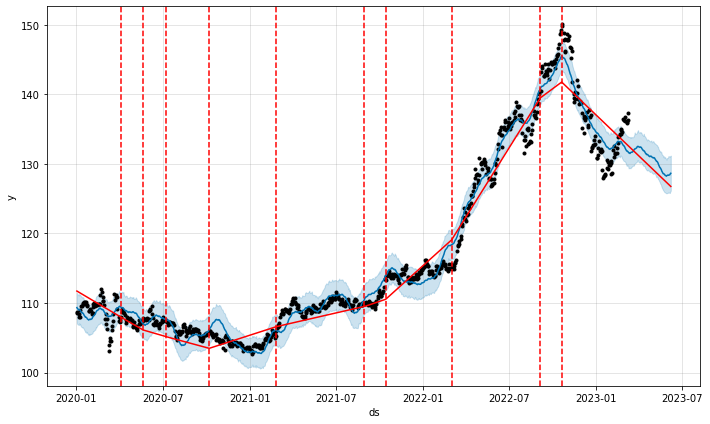

In [180]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [90]:
m = Prophet(changepoint_range=1,changepoint_prior_scale=0.5)
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/6_y6ir06.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/1sp0az6_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43175', 'data', 'file=/tmp/tmp8ho3rjit/6_y6ir06.json', 'init=/tmp/tmp8ho3rjit/1sp0az6_.json', 'output', 'file=/tmp/tmp8ho3rjit/prophet_modelv_z_oivc/prophet_model-20230309174558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:45:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:45:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [91]:
future = m.make_future_dataframe(periods=90)
future['weekday'] = future['ds'].dt.weekday
future = future[future['weekday']<5]
forecast = m.predict(future)

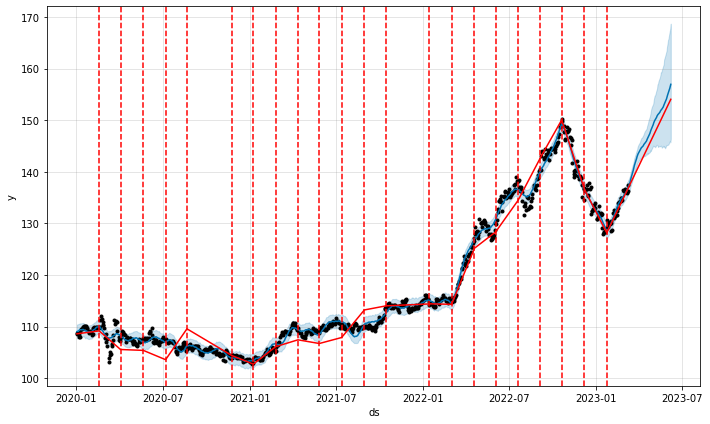

In [92]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

トレンド変化点候補はchangepointsで直接指定することもできる
（指定した時点でのみがトレンド変化点候補となる（指定してもトレンド変化点とならない場合もある））

In [105]:
changepoints = ['2020-02-24','2020-03-07','2020-03-26','2022-03-05','2022-10-20']

In [106]:
m = Prophet(changepoints=changepoints)
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/kwrnl8ep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/rzianoyt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55108', 'data', 'file=/tmp/tmp8ho3rjit/kwrnl8ep.json', 'init=/tmp/tmp8ho3rjit/rzianoyt.json', 'output', 'file=/tmp/tmp8ho3rjit/prophet_modelz1aoxfou/prophet_model-20230309175905.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:59:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:59:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [107]:
future = m.make_future_dataframe(periods=90)
future['weekday'] = future['ds'].dt.weekday
future = future[future['weekday']<5]
forecast = m.predict(future)

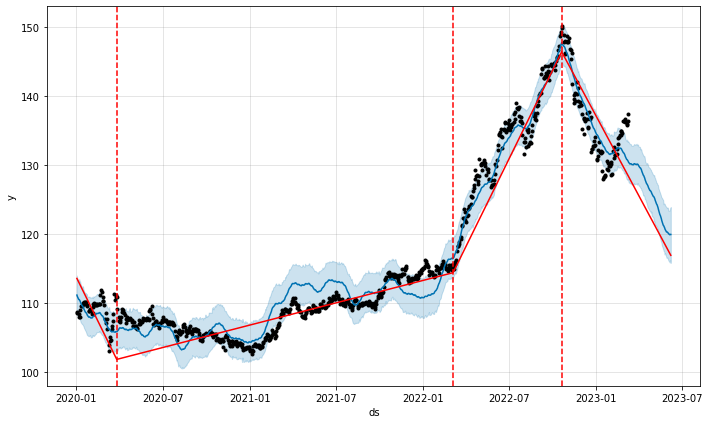

In [108]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

変化点の初期値を指定　n_changepoints

In [112]:
m = Prophet(changepoint_range=1, n_changepoints=100)
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/g5_2tyhj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/klb2jpuo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17897', 'data', 'file=/tmp/tmp8ho3rjit/g5_2tyhj.json', 'init=/tmp/tmp8ho3rjit/klb2jpuo.json', 'output', 'file=/tmp/tmp8ho3rjit/prophet_modelnxv2awgh/prophet_model-20230309180223.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:02:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:02:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [113]:
future = m.make_future_dataframe(periods=90)
future['weekday'] = future['ds'].dt.weekday
future = future[future['weekday']<5]
forecast = m.predict(future)

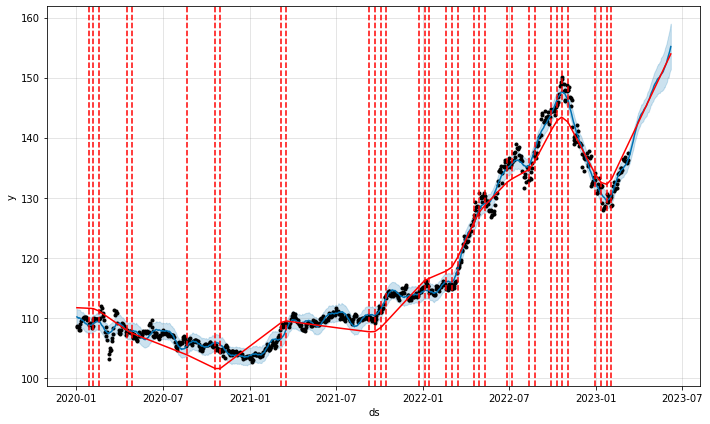

In [114]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [127]:
len(df)

831

In [152]:
m = Prophet(changepoint_range=1, n_changepoints=50, changepoint_prior_scale=0.5)
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/mymat3zz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/e8avf61w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60857', 'data', 'file=/tmp/tmp8ho3rjit/mymat3zz.json', 'init=/tmp/tmp8ho3rjit/e8avf61w.json', 'output', 'file=/tmp/tmp8ho3rjit/prophet_modelwu7392aw/prophet_model-20230309180956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:09:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:09:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [153]:
future = m.make_future_dataframe(periods=90)
future['weekday'] = future['ds'].dt.weekday
future = future[future['weekday']<5]
forecast = m.predict(future)

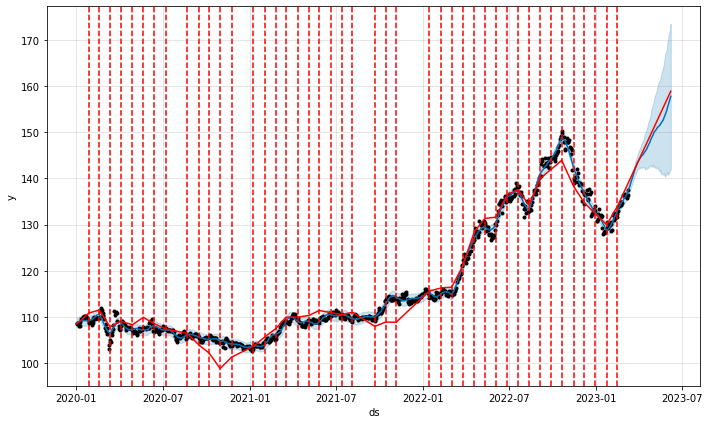

In [154]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [161]:
m.params['delta']

array([[-4.93843e-01, -1.46181e+00,  1.65723e+00, -6.70070e-01,
         7.71511e-01, -9.89405e-01,  8.51779e-02,  2.05920e-01,
         3.17659e-03, -6.13034e-01,  1.46286e-01, -4.93420e-01,
         1.91551e+00, -3.92657e-01, -5.75724e-03,  2.58028e-01,
        -6.01064e-02,  2.87863e-01, -8.81693e-01,  1.27963e-01,
         2.48169e-01, -5.15699e-01, -2.05810e-02,  3.43001e-01,
        -6.86987e-01, -3.29512e-04,  8.19758e-01, -3.30202e-01,
         7.69398e-01, -6.07655e-03, -8.47146e-03, -5.25485e-01,
        -1.59742e-01,  1.45593e+00,  8.22693e-01, -1.33694e+00,
        -8.98353e-01,  1.47602e+00, -1.20868e+00, -1.48428e+00,
         2.97633e+00, -1.19768e+00,  2.41798e-02, -2.41911e+00,
         5.15195e-01,  4.36607e-01,  1.34890e-02,  2.14560e+00,
         3.37264e-01,  0.00000e+00]])

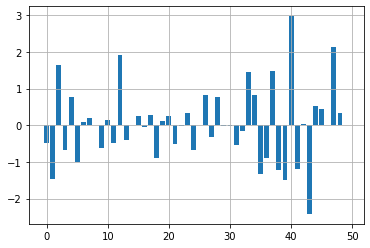

In [169]:
plt.bar(x=[i for i in range(50)], height=m.params['delta'][0])
plt.grid()
plt.show()

In [172]:
delta = m.params['delta']

In [173]:
delta2 = delta>1

In [174]:
delta2

array([[False, False,  True, False, False, False, False, False, False,
        False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False,  True, False, False,
        False,  True, False, False,  True, False, False, False, False,
        False, False,  True, False, False]])

In [175]:
delta3 = delta<-1

In [176]:
delta3

array([[False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False,  True,  True, False,  True, False,  True, False,
        False, False, False, False, False]])

In [170]:
m.changepoints

17    2020-01-27
33    2020-02-18
50    2020-03-12
66    2020-04-03
83    2020-04-28
100   2020-05-21
116   2020-06-12
133   2020-07-07
149   2020-07-29
166   2020-08-21
183   2020-09-15
199   2020-10-07
216   2020-10-30
232   2020-11-23
249   2020-12-16
266   2021-01-08
282   2021-02-01
299   2021-02-24
315   2021-03-18
332   2021-04-12
349   2021-05-05
365   2021-05-27
382   2021-06-21
398   2021-07-13
415   2021-08-05
432   2021-08-30
448   2021-09-21
465   2021-10-14
481   2021-11-05
498   2021-11-30
515   2021-12-23
531   2022-01-14
548   2022-02-08
564   2022-03-02
581   2022-03-25
598   2022-04-19
614   2022-05-11
631   2022-06-03
647   2022-06-27
664   2022-07-20
681   2022-08-12
697   2022-09-05
714   2022-09-28
730   2022-10-20
747   2022-11-14
764   2022-12-07
780   2022-12-29
797   2023-01-23
813   2023-02-14
830   2023-03-09
Name: ds, dtype: datetime64[ns]

In [158]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,108.494497,107.713854,109.974888,108.494497,108.494497,0.282696,0.282696,0.282696,0.354724,0.354724,0.354724,-0.072028,-0.072028,-0.072028,0.0,0.0,0.0,108.777193
1,2020-01-03,108.588879,107.691662,109.913793,108.588879,108.588879,0.221373,0.221373,0.221373,0.315777,0.315777,0.315777,-0.094404,-0.094404,-0.094404,0.0,0.0,0.0,108.810252
2,2020-01-06,108.872024,107.763024,109.984087,108.872024,108.872024,0.072401,0.072401,0.072401,0.248661,0.248661,0.248661,-0.176260,-0.176260,-0.176260,0.0,0.0,0.0,108.944425
3,2020-01-07,108.966406,107.847499,110.208472,108.966406,108.966406,0.128728,0.128728,0.128728,0.341161,0.341161,0.341161,-0.212433,-0.212433,-0.212433,0.0,0.0,0.0,109.095134
4,2020-01-08,109.060788,108.104610,110.150706,109.060788,109.060788,0.101121,0.101121,0.101121,0.355856,0.355856,0.355856,-0.254735,-0.254735,-0.254735,0.0,0.0,0.0,109.161909


In [75]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,116.101512,109.774493,112.777163,116.101512,116.101512,-4.870276,-4.870276,-4.870276,1.629542,1.629542,1.629542,-6.499818,-6.499818,-6.499818,0.0,0.0,0.0,111.231236
1,2020-01-03,116.090507,109.438898,112.525038,116.090507,116.090507,-5.093373,-5.093373,-5.093373,1.574722,1.574722,1.574722,-6.668095,-6.668095,-6.668095,0.0,0.0,0.0,110.997134
2,2020-01-06,116.057490,108.915832,112.103296,116.057490,116.057490,-5.608409,-5.608409,-5.608409,1.527754,1.527754,1.527754,-7.136163,-7.136163,-7.136163,0.0,0.0,0.0,110.449081
3,2020-01-07,116.046485,108.781348,111.910171,116.046485,116.046485,-5.657839,-5.657839,-5.657839,1.623836,1.623836,1.623836,-7.281675,-7.281675,-7.281675,0.0,0.0,0.0,110.388646
4,2020-01-08,116.035479,108.575152,111.818541,116.035479,116.035479,-5.780643,-5.780643,-5.780643,1.642112,1.642112,1.642112,-7.422756,-7.422756,-7.422756,0.0,0.0,0.0,110.254836


In [11]:
s = 260*20
m = Prophet(growth='linear',weekly_seasonality=False, changepoint_range=0.95)
#m = Prophet(growth='linear',weekly_seasonality=False, changepoint_range=0.8)
m.fit(df.iloc[-s:][['ds','y']])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/1z7jnkba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/ul2qddhu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38289', 'data', 'file=/tmp/tmp8ho3rjit/1z7jnkba.json', 'init=/tmp/tmp8ho3rjit/ul2qddhu.json', 'output', 'file=/tmp/tmp8ho3rjit/prophet_modeltvu5uyfx/prophet_model-20230309161113.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 1 forecasts with cutoffs between 2022-03-01 00:00:00 and 2022-03-01 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/z_49zur2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8ho3rjit/5feosqyu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31629', 'data', 'file=/tmp/tmp8ho3rjit/z_49zur2.json', 'init=/tmp/tmp8ho3rjit/5feosqyu.json', 'output', 'file=/tmp/tmp8ho3rjit/prophet_modelk5wk7obi/prophet_model-20230309161125.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:11:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:11:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-05-30,106.320118,104.896537,107.842512,107.959999,2005-05-29
1,2005-05-31,106.168486,104.628402,107.713945,108.400002,2005-05-29
2,2005-06-01,106.010152,104.477207,107.541265,108.660004,2005-05-29
3,2005-06-02,105.846979,104.405508,107.363687,108.209999,2005-05-29
4,2005-06-03,105.680833,104.211517,107.162197,107.639999,2005-05-29


In [ ]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,20.563963,4.534751,3.682268,0.035757,0.032895,0.035875,0.393738
1,38 days,21.332409,4.618702,3.764925,0.036588,0.033882,0.036705,0.382315
2,39 days,22.063714,4.697203,3.837802,0.037317,0.034550,0.037436,0.374509
3,40 days,22.949931,4.790609,3.921785,0.038151,0.035572,0.038286,0.367497
4,41 days,23.900795,4.888844,4.015528,0.039040,0.036350,0.039200,0.357266


In [ ]:
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
324,361 days,446.973646,21.141751,15.621281,0.147300,0.114423,0.147098,0.629989
325,362 days,452.295541,21.267241,15.707087,0.148012,0.114255,0.148028,0.628886
326,363 days,458.469861,21.411909,15.800674,0.148898,0.114926,0.148958,0.626902
327,364 days,463.806271,21.536162,15.879673,0.149656,0.114926,0.149581,0.625799
328,365 days,463.166223,21.521297,15.871453,0.149583,0.114423,0.149592,0.626902


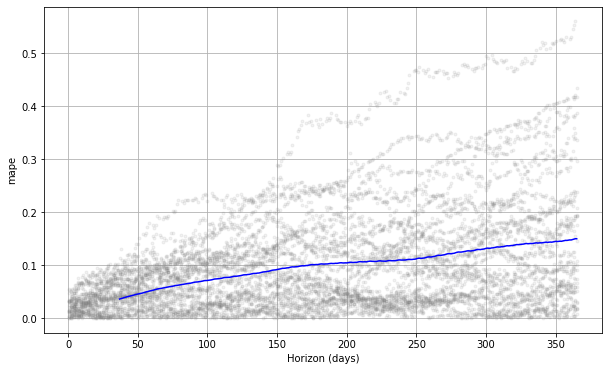

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5225,2023-03-27,144.985754,140.963694,149.309809,144.985754,144.985754,0.118959,0.118959,0.118959,0.118959,0.118959,0.118959,0.0,0.0,0.0,145.104712
5226,2023-03-28,145.043595,141.062952,149.585720,145.043595,145.043595,0.166017,0.166017,0.166017,0.166017,0.166017,0.166017,0.0,0.0,0.0,145.209612
5227,2023-03-29,145.101436,141.124199,149.172675,145.101436,145.101436,0.213798,0.213798,0.213798,0.213798,0.213798,0.213798,0.0,0.0,0.0,145.315234
5228,2023-03-30,145.159277,141.230096,149.786141,145.159277,145.159277,0.261846,0.261846,0.261846,0.261846,0.261846,0.261846,0.0,0.0,0.0,145.421122
5229,2023-03-31,145.217118,141.169037,149.969259,145.217118,145.217118,0.309686,0.309686,0.309686,0.309686,0.309686,0.309686,0.0,0.0,0.0,145.526804


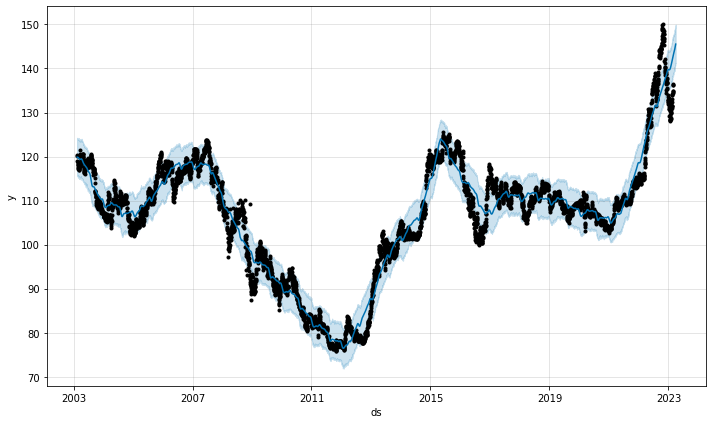

In [ ]:
m.plot(forecast)
plt.show()

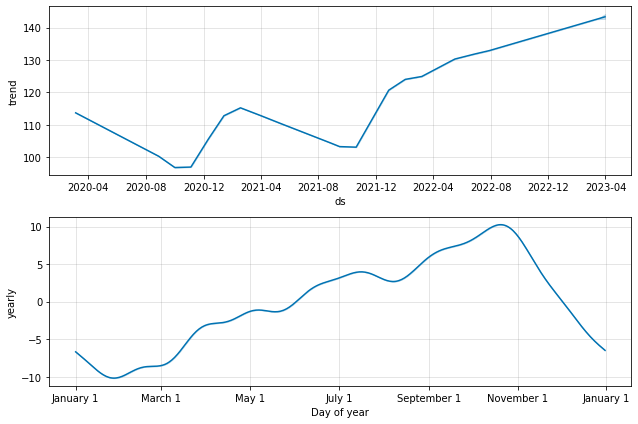

In [ ]:
m.plot_components(forecast)
plt.show()